In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, scale
from yellowbrick.cluster import kelbow_visualizer

In [2]:
df = pd.read_csv('data/seeds.csv')
df.head()

,area,perimeter,compactness,kernel_length,kernel_width,kernel_asymmetry_coef,kernel_groove_length
0,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [3]:
# Basic quality checks
missings = df.isna().sum().sum()
duplicated = df.duplicated().sum()
print(f'Data has {missings} missing and {duplicated} duplicated values.')

Data has 0 missing and 0 duplicated values.


In [4]:
df_scaled = df.apply(scale)
df_scaled.head()

,area,perimeter,compactness,kernel_length,kernel_width,kernel_asymmetry_coef,kernel_groove_length
0,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577,-1.224745
1,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013,-1.224745
2,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192,-1.224745
3,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983,-1.224745
4,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356,-1.224745


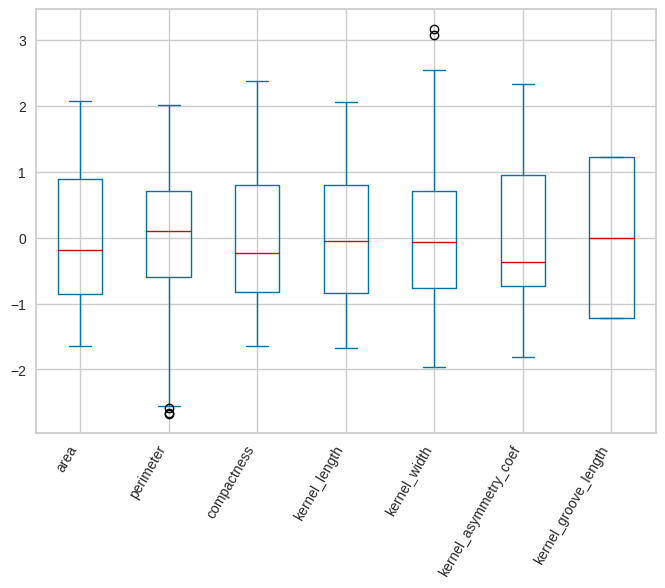

In [5]:
# Plot scaled distribution
df_scaled.plot.box()
plt.xticks(rotation=60, ha='right')
plt.show()

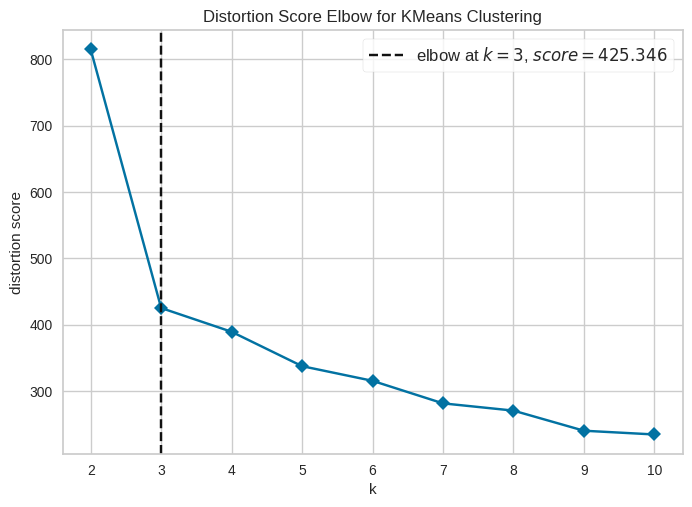

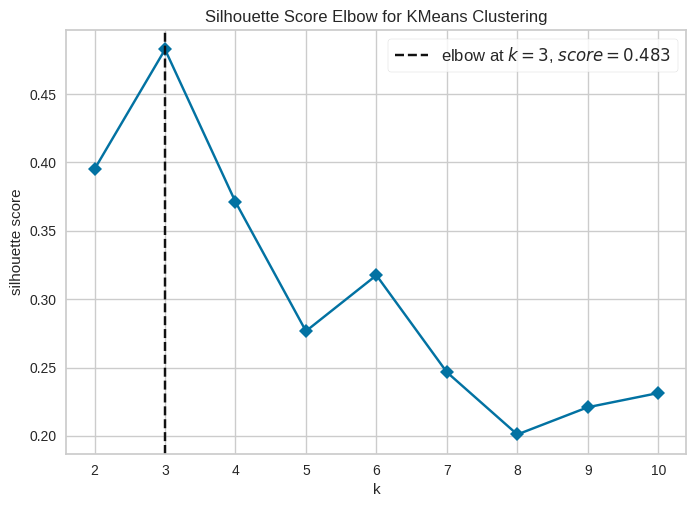

In [6]:
# Find best K
kelbow_visualizer(model=KMeans(n_init='auto'), X=df_scaled, timings=False)
kelbow_visualizer(model=KMeans(n_init='auto'), X=df_scaled, timings=False, metric='silhouette');

In [8]:
# Create and train model
kmeans = KMeans(n_init=10, n_clusters=3, random_state=2023)
kmeans_pipeline = make_pipeline(StandardScaler(), kmeans)
labels = kmeans_pipeline.fit_predict(df)

In [9]:
df.assign(cluster=labels).groupby('cluster').mean()

,area,perimeter,compactness,kernel_length,kernel_width,kernel_asymmetry_coef,kernel_groove_length
cluster,,,,,,,
0,16.165362,0.882833,6.167754,3.678797,3.626667,6.039652,1.985507
1,13.247857,0.849409,5.229514,2.853771,4.788400,5.116400,3.000000
2,14.291408,0.880783,5.497901,3.249380,2.698792,5.081845,1.028169


In [11]:
pd.Series(labels).value_counts()

2    71
1    70
0    69
dtype: int64

In [12]:
# Save model
with open('models/kmeans.pkl', 'wb') as model_file:
    pickle.dump(kmeans_pipeline, model_file)